# K-Means Clustering

## Introduction

### Definition

A unsupervised learning model that groups similar data points together into clusters by minimizing the mean distance between geometric points. To do so, it iteratively partitions datasets into a fixed number (the K) of non-overlapping subgroups (or clusters) wherein each data point belongs to the cluster with the nearest mean cluster center

“K means” refers to the following:
- The number of clusters you specify (K).
- The process of assigning observations to the cluster with the nearest center (mean).


How it works

1.   Initialize all the K centroids
2.   With every pass of the algorithm, each point is assigned to its nearest cluster center.
3.   The cluster centers are then updated to be the “centers” of all the points assigned to it in that pass. This is done by re-calculating the cluster centers as the average of the points in each respective cluster.
4.   The algorithm repeats until there’s a minimum change of the cluster centers from the last iteration.

Frame 50.png

#### Math
1. Initialize all the K centroids (randomly-ish)
2. For loop each observation/datapoints and assign the closest K centroid to it (Euclidean distance)
3. For each clusters, reposition the centroid based on the mean of assigned observations within that cluster
4. Repeat 2 and 3 until convergence



#### Assumptions
1. Unlabelled for unsupervised learning
2. K-means tends to work well when all clusters have a similar number of data points.
4. Clusters are considered to be independent of each other with no overlapping
5. Scale Sensitivity. You need to make sure you normalize your data to be in the same scale. Example age vs income

##### Pros
1. Each to understand and implement
2. Can handle large datasets
3. Adaptability with Different Data Types

##### Cons
1. Have to know how many K/clusters to expect
2. Expect that the clusters are similar in size
3. Susceptibility to Noisy Data and Outliers
4. K-means can converge to a local optimum rather than the global optimum. This limitation means it might not find the best possible clustering
5. Bias to initial centroid placement
6. The standard K-means algorithm is not well-suited for clustering categorical data due to its reliance on Euclidean distances




#### Use Cases
1. Customer Segmentation
2. Sport Player Analysis
3. Image Recognition (What type of flower it is)
4. Document Topic Clustering
5. Clustering patients based on symptoms or medical history, which can be instrumental in diagnosis, treatment planning, or understanding disease patterns


## Wine Data Experiment

### Data Dictionary

*   **Alcohol**: alcohol level (%)

*   **Malic Acid**: Malic Acid is one of the main acids found in the acidity of grapes. Its concentration decreases the more a grape ripens. Malic Acid provides a strong link to wines tasting 'flat' if there is not enough. If there is too much the wine will taste 'sour'.

*   **Ash**: The ash content is defined to be all those products remaining after igniting the residue left after the evaporation of the wine.

*  **Ash Alcanity**: Ash alkalinity refers to the capacity of ash in a substance, such as water or soil, to neutralize acids and is typically measured by the amount of acid required to bring the pH of the substance to a specified level

*   **Magnesium**: Amount of magnesium (Miligrams)

*   **Total Phenols**:  Wine contains many phenolic substances, most of which originate in the grape berry. The phenolics have a number of important functions in wine, affecting the tastes of bitterness and astringency

*   ***Flavanoids***: Flavonoids in wine are a group of natural compounds found in grape skins, seeds, and stems, contributing to the wine's color, flavor, and potential health benefits. Can be found in both white and red wines, reds just have higher concentration

*   ***Nonflavanoid Phenols***: Non-flavonoid phenols in wine are substances that aren't flavonoids but still impact the taste, color, and health qualities of the wine, and they include things like certain acids and compounds like resveratrol.

*   ***Proanthocyanins***: Proanthocyanidins are key metabolites that explain wine sensorial character (bitterness and astringency) and red wine color changes during aging. It's subjectively measured.

*   ***Color Intensity***: In terms of appearance, the more concentrated and opaque the color, the higher the intensity should be. You will often see wines described as “pale, medium or dark” and this is an indication of intensity. The darker the color, the more intense the wine should taste.

*   ***Hue***: Wines with more red colored hue have a lower pH (high acidity). Wines with a violet colored hue range from around 3.4–3.6 pH (on average). Wines with a more blueish tint (almost like magenta) are over 3.6 pH and possibly closer to 4 (low acidity).

*   ***Proline***: Proline is an amino acid found in wine that contributes to the wine's taste and mouthfeel, influencing both sweetness perception and the texture of the wine.

### Load Data

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
import pandas as pd
#https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering
#wine_data = pd.read_csv('wine-clustering.csv')
wine_data = pd.read_csv('/content/drive/MyDrive/Star Data v2/wine-clustering.csv')

### Looking at the data

In [93]:
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,3


In [94]:
wine_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.449438
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,1.280106
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


Text(0.5, 1.0, 'Wine Data Pairplot')

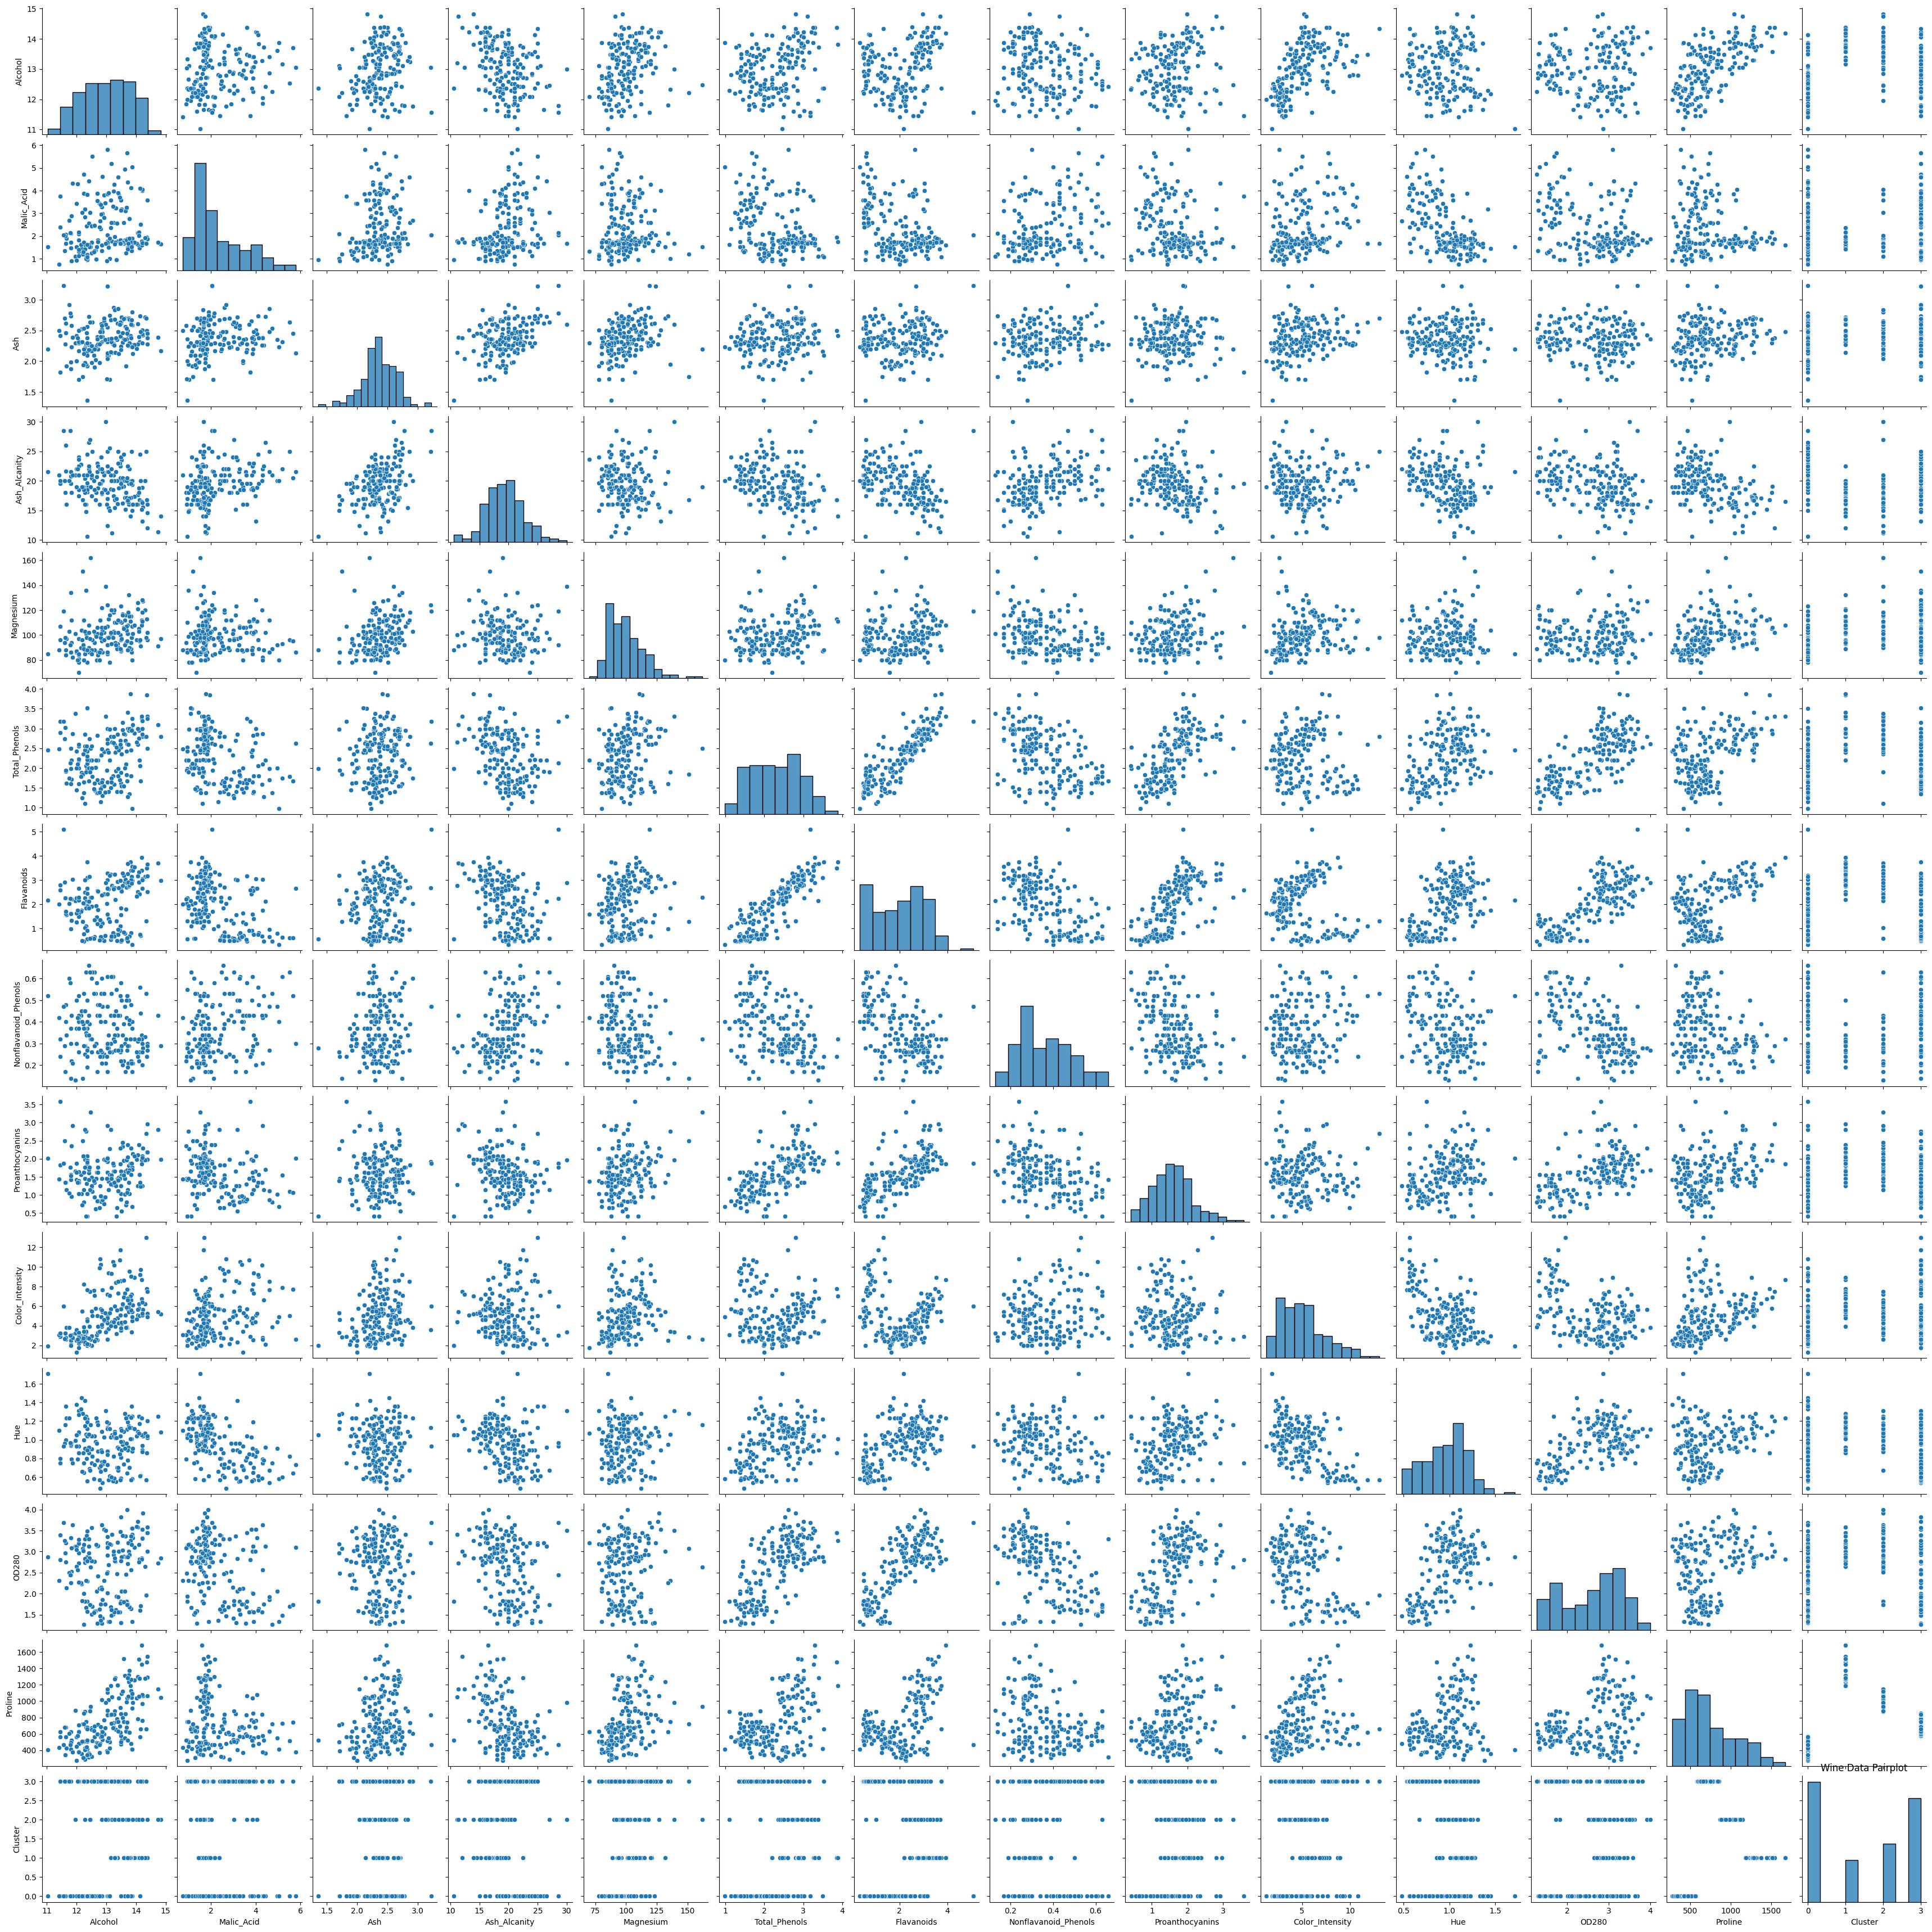

In [95]:
import seaborn as sns

# making the pairplot
sns.pairplot(wine_data)# giving a title to our plots
plt.title("Wine Data Pairplot")

### Elbow Method
We used this method to find the most optimal number of clusters

In [65]:
wine_data = wine_data[['Alcohol', 'Malic_Acid', 'Ash', 'Magnesium', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'Proline']]

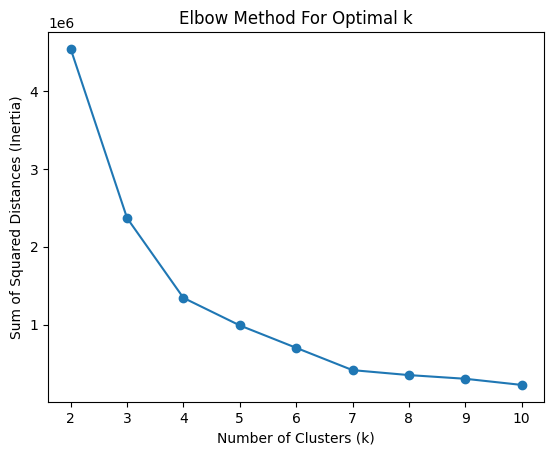

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = wine_data.values

sum_of_squares = []
k_values = [2,3,4,5,6,7,8,9,10]

for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X)
  sum_of_squares.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(k_values, sum_of_squares, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()


### Experiment with KMeans Model

#### Using 2 Features

In [83]:
from sklearn.cluster import KMeans

X = wine_data[['Flavanoids', 'Proanthocyanins']].values

kmeans = KMeans(n_clusters=4, random_state=0, max_iter=900, n_init=50).fit(X)
labels = kmeans.predict(X)

In [84]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.39912123455203985

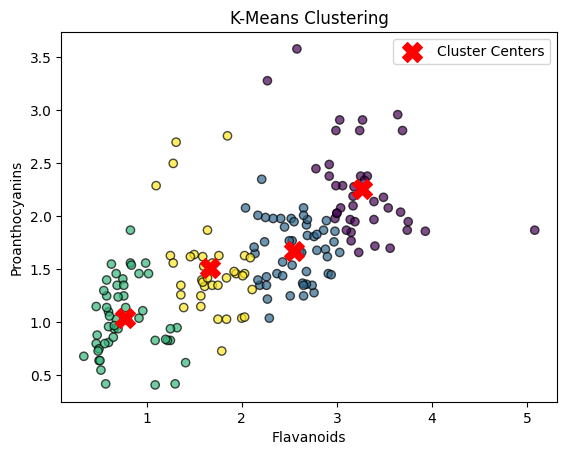

In [86]:
# Get cluster assignments and cluster centers

centers = kmeans.cluster_centers_

# Create a scatter plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', alpha=0.7)

# Plot cluster center
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

# Label axes and provide a title
plt.xlabel('Flavanoids')
plt.ylabel('Proanthocyanins')
plt.title('K-Means Clustering')

# Show the legend
plt.legend()

# Display the plot
plt.show()

#### Using 3 Features

In [88]:
from sklearn.cluster import KMeans

X = wine_data[['Alcohol', 'Color_Intensity', 'Proline']].values

kmeans = KMeans(n_clusters=4, random_state=0, max_iter=900, n_init=50).fit(X)
labels = kmeans.predict(X)

In [89]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.574340057182478

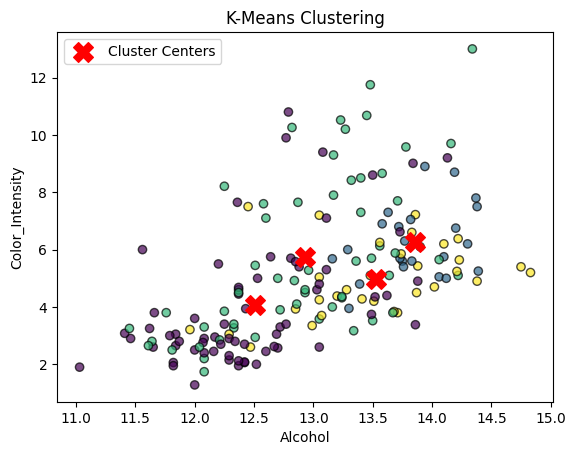

In [91]:
# Get cluster assignments and cluster centers

centers = kmeans.cluster_centers_

# Create a scatter plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', alpha=0.7)

# Plot cluster center
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

# Label axes and provide a title
plt.xlabel('Alcohol')
plt.ylabel('Color_Intensity')
plt.title('K-Means Clustering')

# Show the legend
plt.legend()

# Display the plot
plt.show()

In [92]:
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import pandas as pd

# Assuming 'df' is your DataFrame and it contains the columns 'Alcohol', 'Color Intensity', and 'Proline'
# Example: df = pd.DataFrame(data, columns=['Alcohol', 'Color Intensity', 'Proline'])

df = wine_data
# Applying KMeans Clustering
kmeans = KMeans(n_clusters=4)
df['Cluster'] = kmeans.fit_predict(df[['Alcohol', 'Color_Intensity', 'Proline']])

# Plotting
fig = go.Figure()

for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['Alcohol'],
        y=cluster_data['Color_Intensity'],
        z=cluster_data['Proline'],
        mode='markers',
        marker=dict(size=5),
        name=f'Cluster {cluster}'
    ))

fig.update_layout(
    title='3D Scatter Plot with KMeans Clusters',
    scene=dict(
        xaxis_title='Alcohol',
        yaxis_title='Color Intensity',
        zaxis_title='Proline'
    )
)

fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

